In [1]:
from collections import Counter
import numpy as np
from sys import maxsize

from coolingUnitary import CoolingUnitary
from occupationProbabilitiesList import OccupationProbabilitiesList
from mirrorProtocol import MirrorProtocolUnitary
from mirrorProtocol import MirrorProtocolCircuit
from partnerPairingAlgorithm import PartnerPairingAlgorithmUnitary
from partnerPairingAlgorithm import PartnerPairingAlgorithmCircuit
from minimalWorkProtocol import MinimalWorkProtocolUnitary
from minimalWorkProtocol import MinimalWorkProtocolCircuit
from subOptimalCooling import SubOptimalCoolingCircuit
#from coolingCircuit import CoolingCircuit
from utils import *
from quantumUtils import *

from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.circuit.library import UnitaryGate

In [2]:
def createList(i,j,numQubits):
    l = []
    step = numQubits ** i
    if(i > 0):
        for k in range(numQubits):
            #l.append(k* step + j * numQubits * step + i*(numQubits)-1)
            l.append(k* step + j * numQubits * step + numQubits ** i - 1)
    else:
        for k in range(numQubits):
            l.append(k* step + j * numQubits * step)
    return l

In [3]:
l = createList(1,1,3)
l

[11, 14, 17]

In [13]:
""" def SubOptimalCoolingCircuit(circuit,times):
    
    qubitsCircuit = circuit.num_qubits
    numberOfQubits = qubitsCircuit ** times
    quantumRegisters = QuantumRegister(numberOfQubits,"q")
    classicalRegisters = ClassicalRegister(1,"c")
    finalCircuit = QuantumCircuit(quantumRegisters,classicalRegisters)
    #print(numberOfQubits)
    for i in range(times-1):
        #print(qubitsCircuit**(times-i-1))
        for j in range(qubitsCircuit**(times-i-1)):
            #print(createList(i,j,qubitsCircuit))
            finalCircuit.compose(circuit, qubits=createList(i,j,qubitsCircuit), inplace=True)
    #print()
    #print(createList(times-1,0,qubitsCircuit))
    finalCircuit.compose(circuit, qubits=createList(times-1,0,qubitsCircuit), inplace=True)
    return finalCircuit """

    




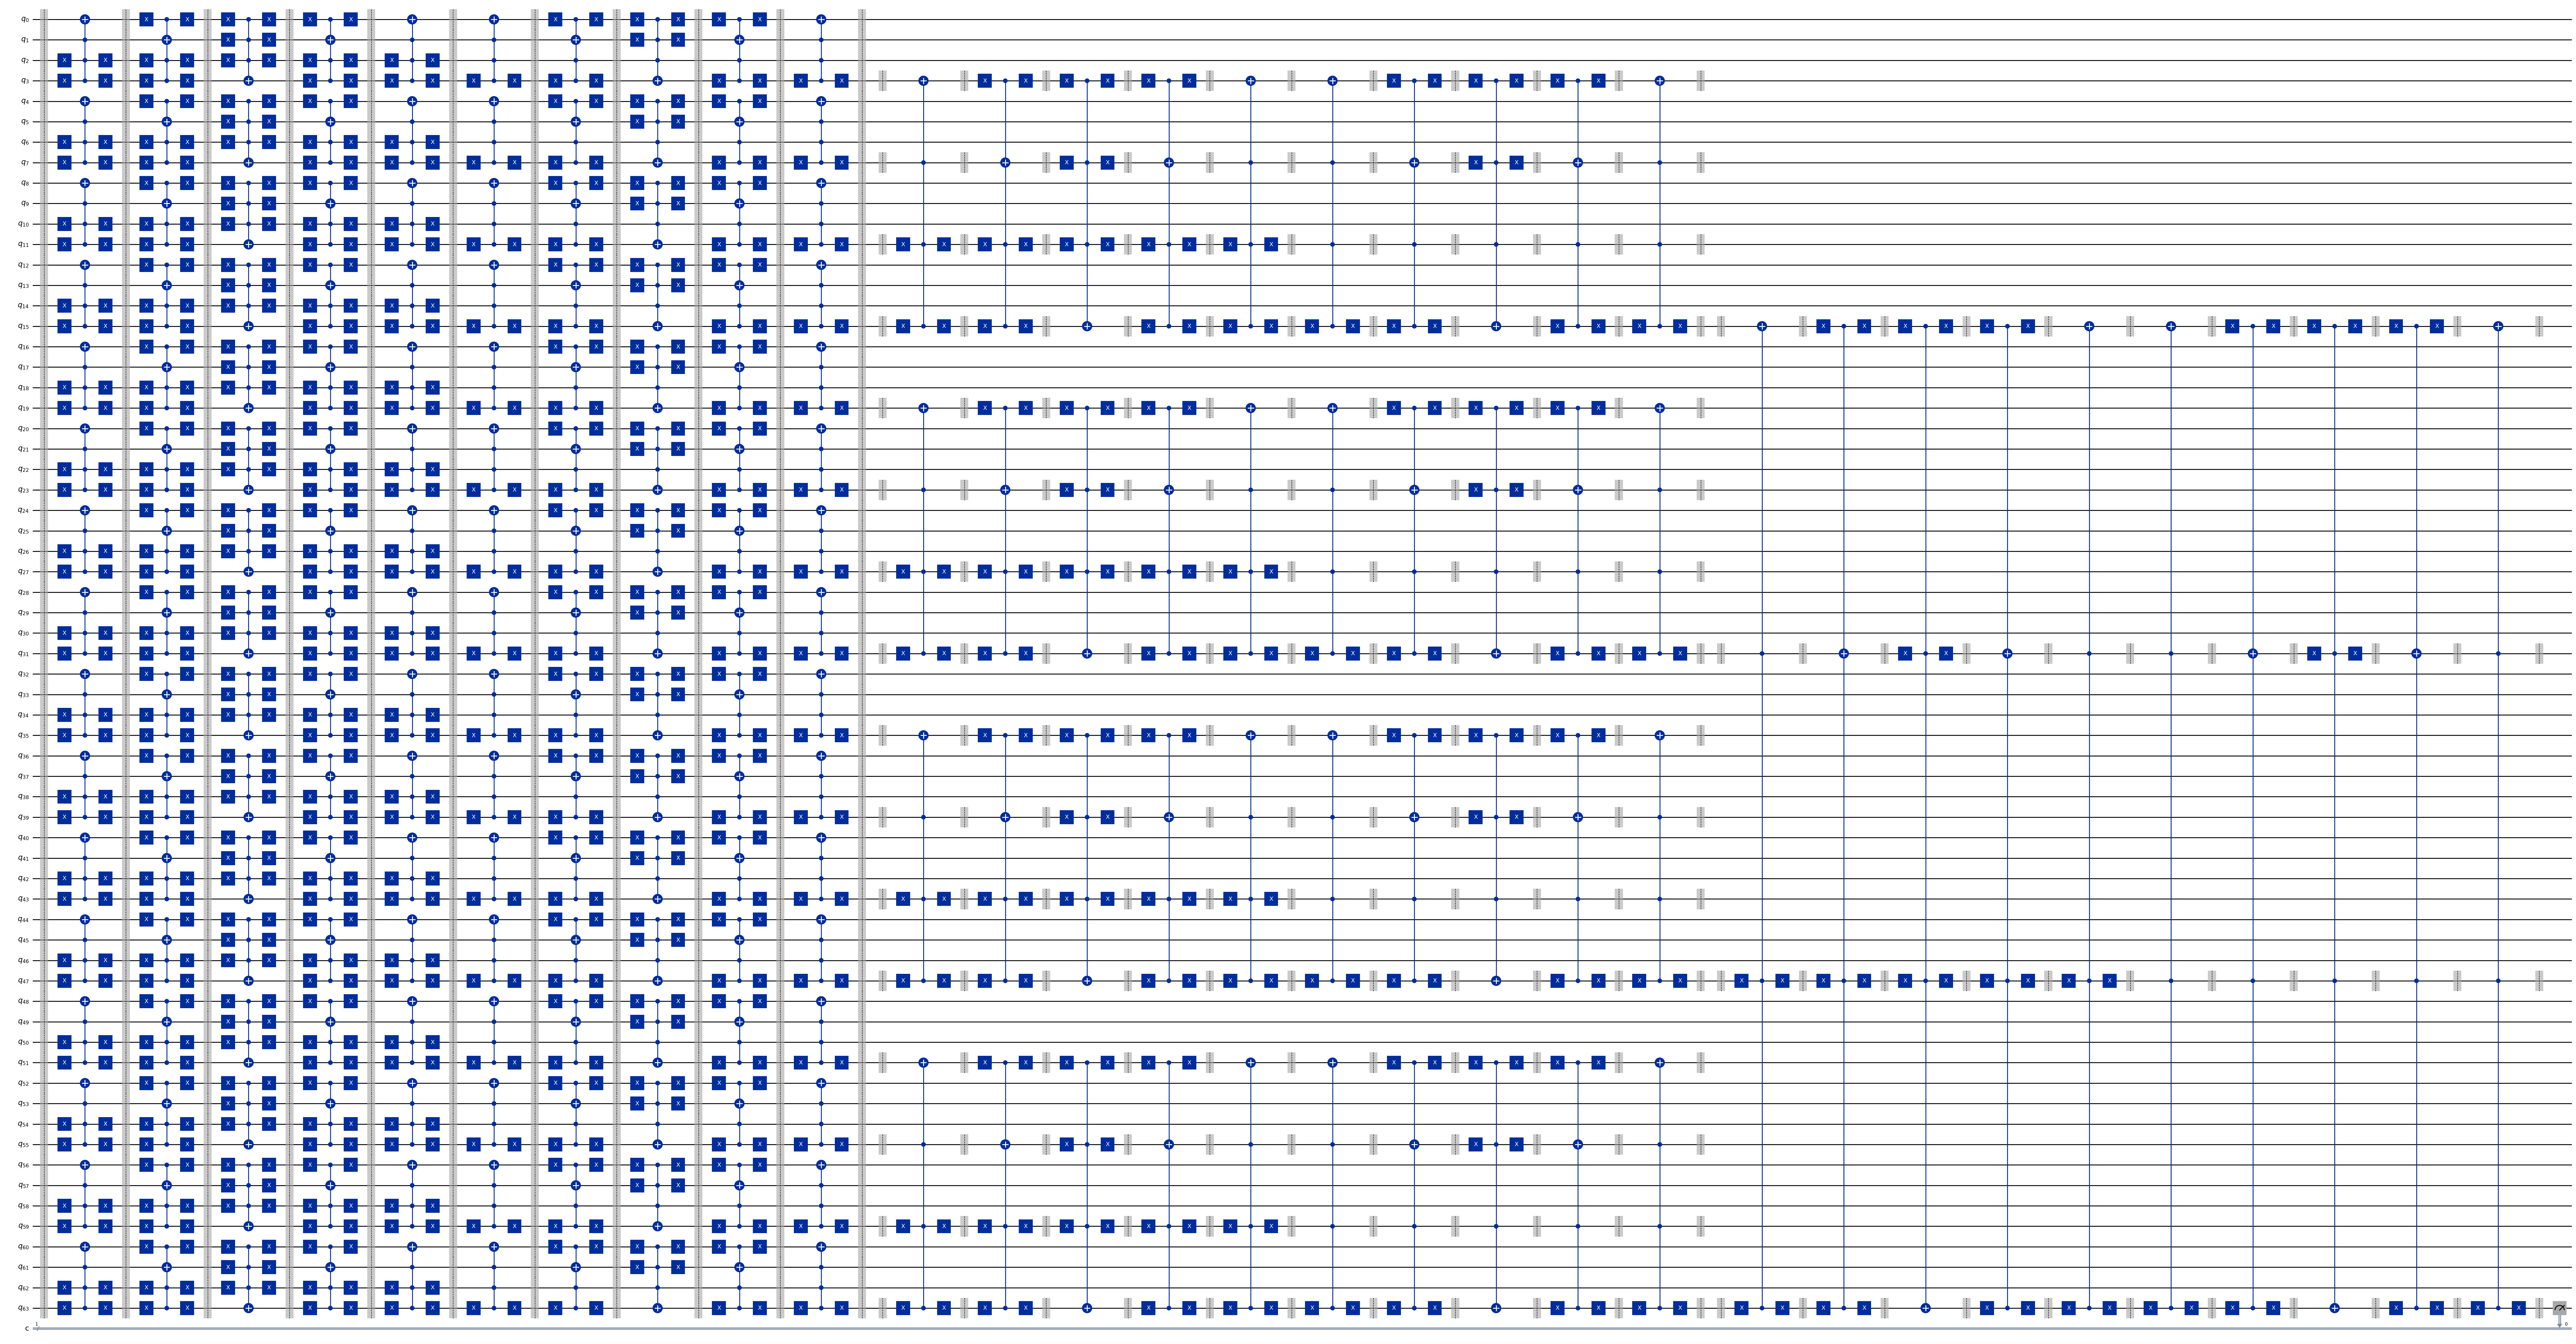

In [16]:
n = 4
r = 3
c = MinimalWorkProtocolCircuit(n)
a = SubOptimalCoolingCircuit(c,r)
a.measure(a.num_qubits-1,0)
a.draw("mpl",fold=maxsize)
#c.draw("mpl")

#testCircuit(c)


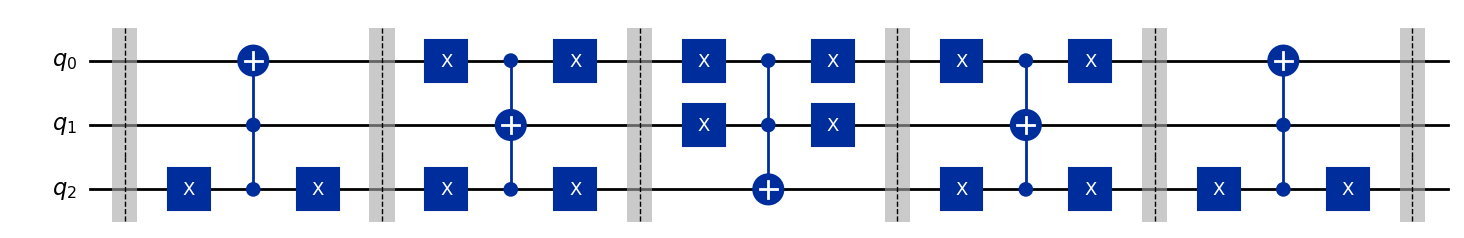

In [12]:
c.clbits.clear()
c.draw("mpl")

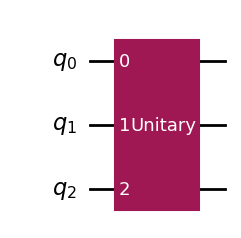

In [15]:
n =3
a = MinimalWorkProtocolUnitary(n)
circ = QuantumCircuit(n)
circ.compose(UnitaryGate(a.toarray()),inplace=True)
circ.draw("mpl",fold=maxsize)

27
9
[0, 1, 2]
[3, 4, 5]
[6, 7, 8]
[9, 10, 11]
[12, 13, 14]
[15, 16, 17]
[18, 19, 20]
[21, 22, 23]
[24, 25, 26]
3
[2, 5, 8]
[11, 14, 17]
[20, 23, 26]

[8, 17, 26]


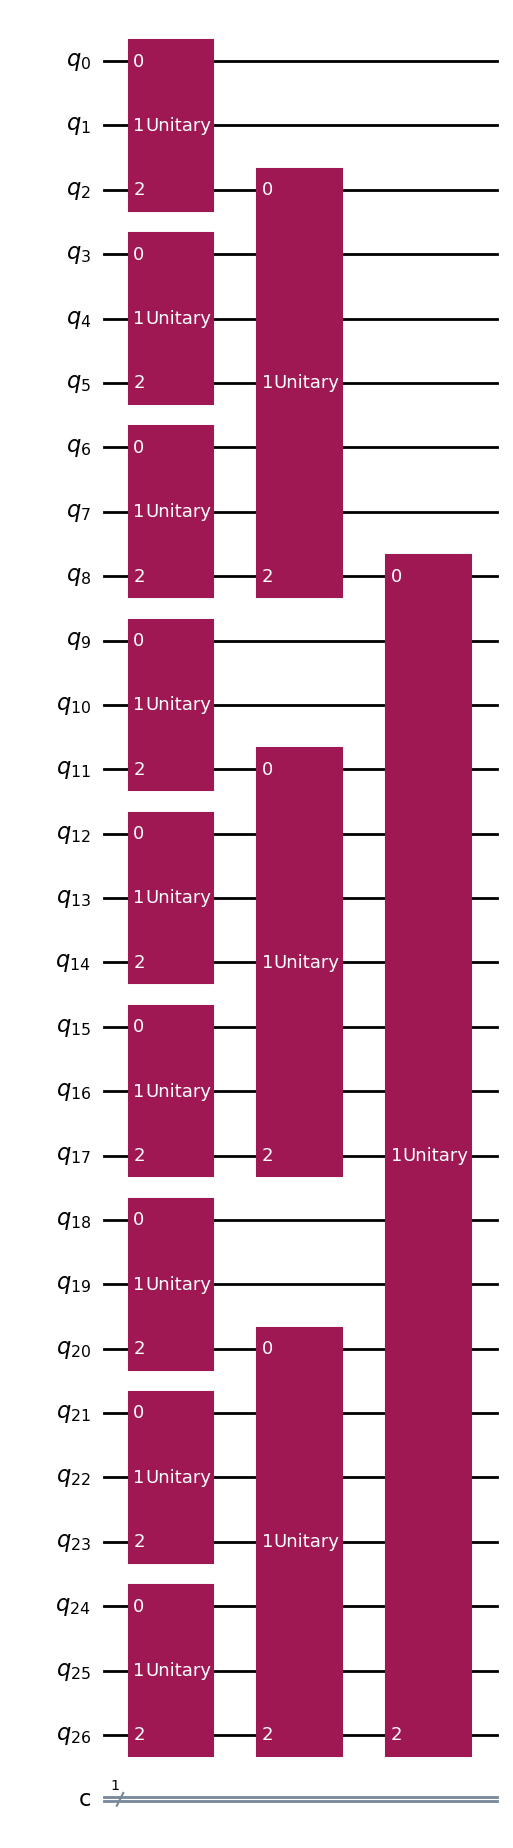

In [19]:
circuit = SubOptimalCoolingCircuit(circ,3)
circuit.draw("mpl",fold=maxsize)